In [ ]:
################################ RF with K-means SMOTE ################################

In [ ]:
#### Uploading the dataset and make some changes ####

In [1]:
# Start with importing the Taiwanese bank dataset.
import pandas as pd

df = pd.read_csv('C:/Users/basvd/OneDrive/Documenten/Tilburg University/Master Data Science & Society/Thesis/Data sets/Taiwan 2005 default credit card data set.csv')



In [2]:
# Show how the dataset looks like.
print(df.head())

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

In [3]:
#Drop the ID column, since it has no value to the models that needs to be made.
df = df.drop(df.columns[0], axis=1)
print(df.head())


   LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0    20000.0    2          2         1   24      2      2     -1     -1   
1   120000.0    2          2         2   26     -1      2      0      0   
2    90000.0    2          2         2   34      0      0      0      0   
3    50000.0    2          2         1   37      0      0      0      0   
4    50000.0    1          2         1   57     -1      0     -1      0   

   PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0     -2  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1      0  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2      0  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3      0  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4      0  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0     

In [4]:
# See if there is any row with NA values in there.
## Below shows that there is no row with an NA value, meaning that we do not have to drop any row or fill it with, for example, the average.
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
# Normalize (just like in the last paper) the non-categorical independent variables.
from sklearn.preprocessing import MinMaxScaler

# Specify the columns you want to normalize
columns_to_normalize = ['LIMIT_BAL', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                        'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 
                        'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'AGE']

# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Fit the scaler to the specified columns and transform them
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the normalized DataFrame
print(df)

       LIMIT_BAL  SEX  EDUCATION  MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
0       0.010101    2          2         1  0.051724      2      2     -1   
1       0.111111    2          2         2  0.086207     -1      2      0   
2       0.080808    2          2         2  0.224138      0      0      0   
3       0.040404    2          2         1  0.275862      0      0      0   
4       0.040404    1          2         1  0.620690     -1      0     -1   
...          ...  ...        ...       ...       ...    ...    ...    ...   
29995   0.212121    1          3         1  0.310345      0      0      0   
29996   0.141414    1          3         2  0.379310     -1     -1     -1   
29997   0.020202    1          2         2  0.275862      4      3      2   
29998   0.070707    1          3         1  0.344828      1     -1      0   
29999   0.040404    1          2         1  0.431034      0      0      0   

       PAY_4  PAY_5  ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AM

In [6]:
# Print the minimum and maximum values of the columns to check if they are indeed normalised.
print("Minimum values:")
print(df.min())

print("\nMaximum values:")
print(df.max())


Minimum values:
LIMIT_BAL                     0.0
SEX                           1.0
EDUCATION                     0.0
MARRIAGE                      0.0
AGE                           0.0
PAY_0                        -2.0
PAY_2                        -2.0
PAY_3                        -2.0
PAY_4                        -2.0
PAY_5                        -2.0
PAY_6                        -2.0
BILL_AMT1                     0.0
BILL_AMT2                     0.0
BILL_AMT3                     0.0
BILL_AMT4                     0.0
BILL_AMT5                     0.0
BILL_AMT6                     0.0
PAY_AMT1                      0.0
PAY_AMT2                      0.0
PAY_AMT3                      0.0
PAY_AMT4                      0.0
PAY_AMT5                      0.0
PAY_AMT6                      0.0
default.payment.next.month    0.0
dtype: float64

Maximum values:
LIMIT_BAL                     1.0
SEX                           2.0
EDUCATION                     6.0
MARRIAGE                      3.0


In [7]:
# First we will see how the classes are divided.
from collections import Counter
input_cols = df.drop(columns='default.payment.next.month')
target_col = df['default.payment.next.month']
print('Original dataset shape %s' % Counter(target_col))

Original dataset shape Counter({0: 23364, 1: 6636})


In [8]:
# Now we will implement K-means SMOTE to get the classes balanced again.
from sklearn.cluster import KMeans
from imblearn.over_sampling import KMeansSMOTE
from collections import Counter

# Fit KMeans to obtain cluster centers
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(input_cols)

# Use KMeans centroids as initial cluster centers for KMeansSMOTE
kmeans_smote = KMeansSMOTE(sampling_strategy='auto', random_state=42, kmeans_estimator=kmeans)
input_cols_res_K, target_col_res_K = kmeans_smote.fit_resample(input_cols, target_col)
print('Resampled dataset shape %s' % Counter(target_col_res_K))

c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\basvd\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


Resampled dataset shape Counter({1: 23365, 0: 23364})


In [ ]:
#### Nested K-fold cross-validation ####

In [9]:
# K-means SMOTE plus automatic nested cross-validation for random forest on a classification dataset
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_predict

# configure the cross-validation procedure
cv_inner_K = KFold(n_splits=3, shuffle=True, random_state=42)
# define the model
model = RandomForestClassifier(random_state=42)
# define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]
# define search
search_K = GridSearchCV(model, space, scoring='f1', n_jobs=1, cv=cv_inner_K, refit=True)
# configure the cross-validation procedure
cv_outer_K = KFold(n_splits=10, shuffle=True, random_state=1)

# Execute the nested cross-validation
predicted_labels_K = cross_val_predict(search_K, input_cols_res_K, target_col_res_K, cv=cv_outer_K, n_jobs=-1)

# Generate the classification report
report_K = classification_report(target_col_res_K, predicted_labels_K, digits= 4)
print(report_K)

              precision    recall  f1-score   support

           0     0.8493    0.9271    0.8865     23364
           1     0.9197    0.8355    0.8756     23365

    accuracy                         0.8813     46729
   macro avg     0.8845    0.8813    0.8810     46729
weighted avg     0.8845    0.8813    0.8810     46729



In [57]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# Calculate recall, accuracy, and precision on the test set
recall = recall_score(target_col_res_K, predicted_labels_K)
print("Recall:", "{:.4f}".format(recall))

accuracy = accuracy_score(target_col_res_K, predicted_labels_K)
print("Accuracy:", "{:.4f}".format(accuracy))

precision = precision_score(target_col_res_K, predicted_labels_K)
print("Precision:", "{:.4f}".format(precision))

f1 = f1_score(target_col_res_K, predicted_labels_K)
print("F1 Score:", "{:.4f}".format(f1))

Recall: 0.8355
Accuracy: 0.8813
Precision: 0.9197
F1 Score: 0.8756


In [58]:
# Calculate confusion matrix
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(target_col_res_K, predicted_labels_K)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[21660  1704]
 [ 3844 19521]]


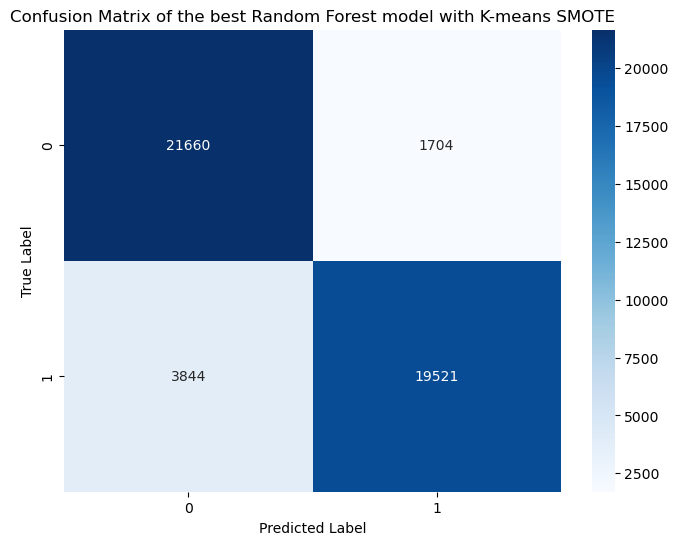

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Define plot_confusion_matrix function
def plot_confusion_matrix(cm, set_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix of the best Random Forest model with K-means SMOTE")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Calculate confusion matrix
conf_matrix = confusion_matrix(target_col_res_K, predicted_labels_K)

# Plot confusion matrix
plot_confusion_matrix(conf_matrix, "Test")

Best Hyperparameters: {'max_features': 10, 'n_estimators': 50}


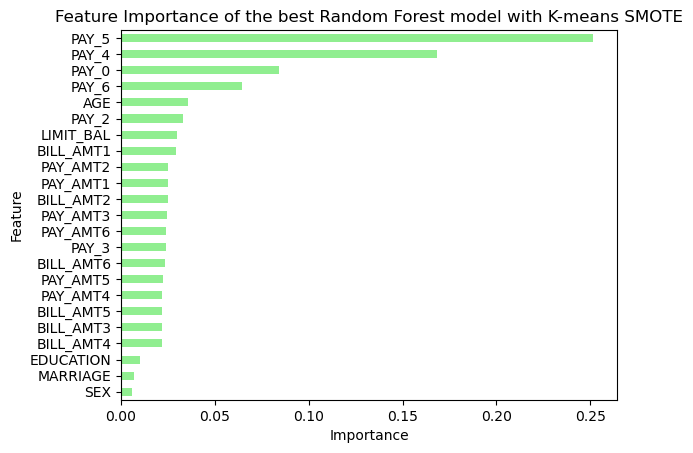

In [60]:
# Best hyperparameters and feature importance
import matplotlib.pyplot as plt
import pandas as pd
search_K.fit(input_cols_res_K, target_col_res_K)

# Access the best hyperparameters
best_params = search_K.best_params_
print("Best Hyperparameters:", best_params)

importances = pd.Series(data=search_K.best_estimator_.feature_importances_, index=input_cols_res_K.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Feature Importance of the best Random Forest model with K-means SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#### Normal Random Forest ####

In [10]:
# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split

X_train_K, X_test_K, y_train_K, y_test_K = train_test_split(input_cols_res_K, target_col_res_K, random_state=42, test_size=0.2)

# Further splitting the training set into training and validation sets
X_train_K, X_valid_K, y_train_K, y_valid_K = train_test_split(X_train_K, y_train_K, random_state=42, test_size=0.25)

print(X_train_K.shape)
print(X_test_K.shape)
print(X_valid_K.shape)
print(y_valid_K.shape)
print(y_train_K.shape)
print(y_test_K.shape)


(28037, 23)
(9346, 23)
(9346, 23)
(9346,)
(28037,)
(9346,)


In [32]:
# First RF model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
rf_K = RandomForestClassifier(random_state=0).fit(X_train_K, y_train_K)
y_pred_K = rf_K.predict(X_valid_K)

# Calculate the F1 score and classification report
rf_f1_K = f1_score(y_valid_K, y_pred_K)
print("F1 Score:", "{:.4f}".format(rf_f1_K))
print(classification_report(y_valid_K, y_pred_K))

F1 Score: 0.8736
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4709
           1       0.91      0.84      0.87      4637

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [12]:
# Get the number of trees (100) --> Shows the standard amount of trees, since I did not specify it.
n_estimators_used = rf_K.n_estimators

# Get the maximum number of features (sqrt) --> The sqrt of the amount of features, which will be 4 (rounded down).
max_features_used = rf_K.max_features

print("Number of trees (n_estimators):", n_estimators_used)
print("Maximum number of features (max_features):", max_features_used)

Number of trees (n_estimators): 100
Maximum number of features (max_features): sqrt


Text(0.5, 1.0, 'Features Importances')

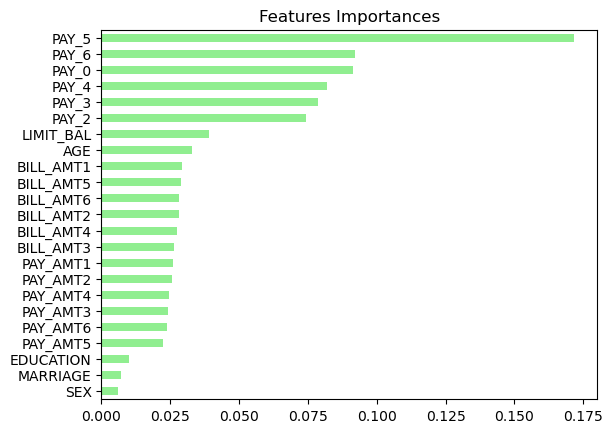

In [18]:
#Feature importance
import matplotlib.pyplot as plt
importances = pd.Series(data=rf_K.feature_importances_, index=X_train_K.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')

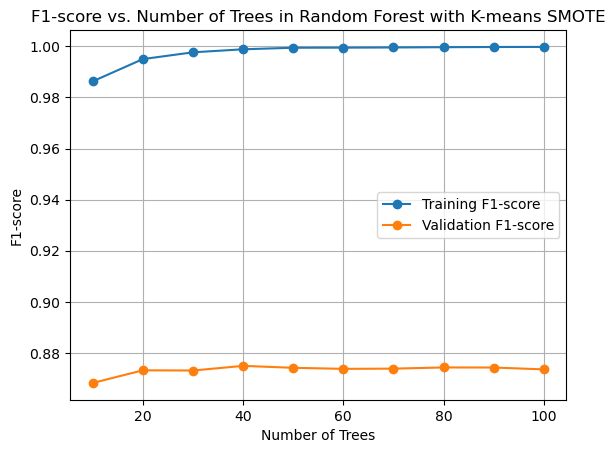

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Define a range of values for the number of trees
num_trees_range_K = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Initialize lists to store F1-scores for training and validation sets
train_f1_scores_K = []
valid_f1_scores_K = []

# Train RandomForestClassifier models with different numbers of trees
for num_trees in num_trees_range_K:
    # Create and train the model
    rf_K = RandomForestClassifier(n_estimators=num_trees, random_state=0)
    rf_K.fit(X_train_K, y_train_K)
    
    # Predict on training and validation sets
    y_train_pred_K = rf_K.predict(X_train_K)
    y_valid_pred_K = rf_K.predict(X_valid_K)
    
    # Calculate F1-scores for training and validation sets
    train_f1_K = f1_score(y_train_K, y_train_pred_K)
    valid_f1_K = f1_score(y_valid_K, y_valid_pred_K)
    
    # Append F1-scores to the lists
    train_f1_scores_K.append(train_f1_K)
    valid_f1_scores_K.append(valid_f1_K)

# Plot the F1-scores for training and validation sets against the number of trees
plt.plot(num_trees_range_K, train_f1_scores_K, label='Training F1-score', marker='o')
plt.plot(num_trees_range_K, valid_f1_scores_K, label='Validation F1-score', marker='o')
plt.xlabel('Number of Trees')
plt.ylabel('F1-score')
plt.title('F1-score vs. Number of Trees in Random Forest with K-means SMOTE')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
# Predict labels on the test set
y_pred_test_K = rf_K.predict(X_test_K)

# Calculate the F1 score on the test set
rf_f1_test_K = f1_score(y_test_K, y_pred_test_K)
print("F1 Score on Test Set:", "{:.4f}".format(rf_f1_test_K))

print("Classification Report on Test Set:")
print(classification_report(y_test_K, y_pred_test_K))

F1 Score on Test Set: 0.8721
Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [ ]:
#### Bagging ####

In [34]:
# Normal RF with bagging (10 bags) for K-means SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_10 = BaggingClassifier(base_classifier, n_estimators=10, random_state=0)

# Train the BaggingClassifier
bagging_classifier_10.fit(X_train_K, y_train_K)

# Predict using the BaggingClassifier
y_pred_K_10 = bagging_classifier_10.predict(X_valid_K)

# Calculate the f1-score and print classification report
bagging_f1_K_10 = f1_score(y_valid_K, y_pred_K_10)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_10))

print("Classification Report:")
print(classification_report(y_valid_K, y_pred_K_10))

F1 Score: 0.8758
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      4709
           1       0.92      0.84      0.88      4637

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [36]:
# Predict using the BaggingClassifier on the test set
y_pred_K_10_test = bagging_classifier_10.predict(X_test_K)

# Calculate the F1-score and print classification report for the test set
bagging_f1_K_10_test = f1_score(y_test_K, y_pred_K_10_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_10_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_K, y_pred_K_10_test))

F1 Score: 0.8733
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [37]:
# Normal RF with bagging (25 bags) for K-means SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_25 = BaggingClassifier(base_classifier, n_estimators=25, random_state=0)

# Train the BaggingClassifier
bagging_classifier_25.fit(X_train_K, y_train_K)

# Predict using the BaggingClassifier
y_pred_K_25 = bagging_classifier_25.predict(X_valid_K)

# Calculate the f1-score and print classification report
bagging_f1_K_25 = f1_score(y_valid_K, y_pred_K_25)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_25))

print("Classification Report:")
print(classification_report(y_valid_K, y_pred_K_25))

F1 Score: 0.8765
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4709
           1       0.92      0.84      0.88      4637

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.89      0.88      0.88      9346



In [39]:
# Predict using the BaggingClassifier on the test set
y_pred_K_25_test = bagging_classifier_25.predict(X_test_K)

# Calculate the F1-score and print classification report for the test set
bagging_f1_K_25_test = f1_score(y_test_K, y_pred_K_25_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_25_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_K, y_pred_K_25_test))

F1 Score: 0.8736
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [41]:
# Normal RF with bagging (50) bags) for K-means SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_50 = BaggingClassifier(base_classifier, n_estimators=50, random_state=0)

# Train the BaggingClassifier
bagging_classifier_50.fit(X_train_K, y_train_K)

# Predict using the BaggingClassifier
y_pred_K_50 = bagging_classifier_50.predict(X_valid_K)

# Calculate the f1-score and print classification report
bagging_f1_K_50 = f1_score(y_valid_K, y_pred_K_50)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_50))

print("Classification Report:")
print(classification_report(y_valid_K, y_pred_K_50))

F1 Score: 0.8762
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4709
           1       0.92      0.84      0.88      4637

    accuracy                           0.88      9346
   macro avg       0.89      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [43]:
# Predict using the BaggingClassifier on the test set
y_pred_K_50_test = bagging_classifier_50.predict(X_test_K)

# Calculate the F1-score and print classification report for the test set
bagging_f1_K_50_test = f1_score(y_test_K, y_pred_K_50_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_50_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_K, y_pred_K_50_test))

F1 Score: 0.8735
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [44]:
# Normal RF with bagging (100 bags) for K-means SMOTE
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create the RandomForestClassifier with 50 trees
base_classifier = RandomForestClassifier(n_estimators=50, max_features=10, random_state=0)

# Create a BaggingClassifier
bagging_classifier_100 = BaggingClassifier(base_classifier, n_estimators=100, random_state=0)

# Train the BaggingClassifier
bagging_classifier_100.fit(X_train_K, y_train_K)

# Predict using the BaggingClassifier
y_pred_K_100 = bagging_classifier_100.predict(X_valid_K)

# Calculate the f1-score and print classification report
bagging_f1_K_100 = f1_score(y_valid_K, y_pred_K_100)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_100))

print("Classification Report:")
print(classification_report(y_valid_K, y_pred_K_100))

F1 Score: 0.8752
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.89      4709
           1       0.92      0.84      0.88      4637

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [45]:
# Predict using the BaggingClassifier on the test set
y_pred_K_100_test = bagging_classifier_100.predict(X_test_K)

# Calculate the F1-score and print classification report for the test set
bagging_f1_K_100_test = f1_score(y_test_K, y_pred_K_100_test)
print("F1 Score:", "{:.4f}".format(bagging_f1_K_100_test))

print("Classification Report for Test Set:")
print(classification_report(y_test_K, y_pred_K_100_test))

F1 Score: 0.8739
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      4644
           1       0.92      0.83      0.87      4702

    accuracy                           0.88      9346
   macro avg       0.88      0.88      0.88      9346
weighted avg       0.88      0.88      0.88      9346



In [9]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Configure the cross-validation procedure
cv_inner = KFold(n_splits=3, shuffle=True, random_state=42)
cv_outer = KFold(n_splits=10, shuffle=True, random_state=1)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define search space
space = dict()
space['n_estimators'] = [40, 50, 60]
space['max_features'] = [None, 5, 10]

# Initialize lists to hold classification reports
train_reports = []
valid_reports = []
test_reports = []

# Perform nested cross-validation
for train_index, test_index in cv_outer.split(input_cols_res_K):
    X_train, X_test = input_cols_res_K.iloc[train_index], input_cols_res_K.iloc[test_index]
    y_train, y_test = target_col_res_K.iloc[train_index], target_col_res_K.iloc[test_index]

    # Inner loop: GridSearchCV with inner cross-validation
    search = GridSearchCV(model, space, scoring='f1', cv=cv_inner, n_jobs=1)
    search.fit(X_train, y_train)
    
    # Get the best estimator from the grid search
    best_estimator = search.best_estimator_

    # Predict on the training set using cross-validation
    y_train_pred = cross_val_predict(best_estimator, X_train, y_train, cv=cv_inner)

    # Predict on the validation set (held-out fold during inner CV)
    y_valid_pred = search.predict(X_train)
    
    # Predict on the test (outer CV) set
    y_test_pred = best_estimator.predict(X_test)
    
    # Generate classification reports
    train_report = classification_report(y_train, y_train_pred, digits=6)
    valid_report = classification_report(y_train, y_valid_pred, digits=6)
    test_report = classification_report(y_test, y_test_pred, digits=6)

    train_reports.append(train_report)
    valid_reports.append(valid_report)
    test_reports.append(test_report)

# Display the reports
print("Training Reports:\n", "\n".join(train_reports))
print("Validation Reports:\n", "\n".join(valid_reports))
print("Test Reports:\n", "\n".join(test_reports))

Training Reports:
               precision    recall  f1-score   support

           0   0.850666  0.923909  0.885776     21080
           1   0.916288  0.837004  0.874854     20976

    accuracy                       0.880564     42056
   macro avg   0.883477  0.880457  0.880315     42056
weighted avg   0.883396  0.880564  0.880328     42056

              precision    recall  f1-score   support

           0   0.851495  0.925262  0.886847     21020
           1   0.918241  0.838753  0.876699     21036

    accuracy                       0.881991     42056
   macro avg   0.884868  0.882007  0.881773     42056
weighted avg   0.884881  0.881991  0.881771     42056

              precision    recall  f1-score   support

           0   0.849808  0.925414  0.886001     20996
           1   0.918404  0.836942  0.875783     21060

    accuracy                       0.881111     42056
   macro avg   0.884106  0.881178  0.880892     42056
weighted avg   0.884158  0.881111  0.880884     42056

